### To see this guide in slideshow form:
Run all cells. <br>
Follow the RISE package documentation (https://github.com/damianavila/RISE) <br>
Command to run: `conda install -c damianavila82 rise` <br>
Once this has been done, "Open the Command Palette" and type 'slideshow' and select the option that shows up under "RISE command group."<br><br>
To move to next slide use right arrow or pg-dn. To move to previous slide use left arrow or pg-up.<br>
To move to sub-slide use pg-dn (or back, use pg-up).<br>
To select a cell, click it. Change it as you would like. <br>
To execute cell, use shift-enter.

# Analyzing and Predicting Bitcoin Prices

The first part of this lab is designed to give a glimpse of how **data science** works in Python, particularly through Pandas (pd) and Numpy (np). This guide will introduce you to how we can gather data from online sources, view data we collect, graph data using PyPlot (plt), and perform basic data cleaning (removing anomalies and filtering results). <br><br>
The second part of the guide covers how we can use Python's **machine learning** toolkit (sklearn) to explore general trends in our data, tune possible models, and predict future prices based on that trend. This part takes a lot of math knowledge to understand fully, but, after finishing this exercise, you will be able to make predictions of market trends using various models!

In [1]:
# Below are the packages we'll be using. 

""" 
Descriptions: 
quandl - allows us to import bitcoin price data from Quandl.com
numpy (np) - allows us to do mathematical calculations on our data
pandas (pd) - lets us store data in dataframes and do lots of interesting operations
matplotlib.pyplot (plt) - lets us visualize data 
"""

import quandl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Goals
- Learn data manipulation techniques 
- Visualize data 
- Filter data
- Understand how we can fit curves to data
- Figure out how predictions work (Extrapolation)

Hopefully this gets you a little excited about data science and machine learning!

# Part 1: BTC Data Analysis with Python

In [2]:
# Go to this link: https://www.quandl.com/data/BCHARTS/ITBITSGD-Bitcoin-Markets-itbitSGD
# follow the instructions on quandl's python page, store the results in the coin_data variable


coin_data = quandl.get("BCHARTS/ITBITSGD")


In [3]:
coin_data.head(5)

,Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price
Date,,,,,,,
2013-11-18,604.2380,610.0000,389.7910,395.7319,2.0000,998.555190,499.277595
2013-11-19,0.0000,0.0000,0.0000,0.0000,0.0000,0.000000,0.000000
2013-11-20,610.4986,628.2049,605.5611,628.2049,11.1360,6796.520903,610.319765
2013-11-21,775.6867,780.2882,775.6867,780.2882,3.9800,3095.555836,777.777848
2013-11-22,860.4848,918.2900,856.3515,918.2900,1.5225,1340.136479,880.221004


In [4]:
# The index of our data frame is the first column (how the data is organized)
coin_data.index

DatetimeIndex(['2013-11-18', '2013-11-19', '2013-11-20', '2013-11-21',
               '2013-11-22', '2013-11-23', '2013-11-24', '2013-11-25',
               '2013-11-26', '2013-11-27',
               ...
               '2018-02-25', '2018-02-26', '2018-02-27', '2018-02-28',
               '2018-03-01', '2018-03-02', '2018-03-03', '2018-03-04',
               '2018-03-05', '2018-03-06'],
              dtype='datetime64[ns]', name='Date', length=1568, freq=None)



### What kind of data is in the index column of coin_data? 

Put your answer below! What do you think?

Answer:

In [48]:
# The index values are DatetimeIndex objects.
print(type(coin_data.index))
# The names of columns in the data frame
coin_data.columns

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


Index(['Open', 'High', 'Low', 'Close', 'Volume (BTC)', 'Volume (Currency)',
       'Weighted Price'],
      dtype='object')

### Which column should we use when graphing out Bitcoin prices? 

Put your answer below! What do you think?

Answer:


**Let's graph this data. Which column should be on the x-axis and which should be on the y-axis? Discuss with a neighbor!**

Answer:

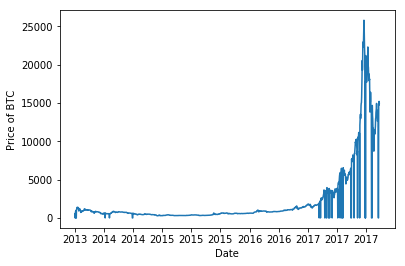

In [6]:
# Get the data you would like to use

x0 = coin_data.index
# Set y0 to be coin_data[ the column containing price info ]
y0 = coin_data["Weighted Price"]

plt.plot(x0, y0)
plt.ylabel("Price of BTC")
plt.xlabel("Date")
plt.xticks(x0[::150])

# Run plt.show() to see your graph
plt.show()

Look closely. Do you see any anomalies? (Hint: What do those vertical lines mean? What should we do about them?)

Answer:

# Cleaning the data
In this case, **prices of 0** are messing up our data set. Removing them will solve our issue of anomalies in our data. 

Simply removing data could introduce discontinuities in time into our data set. Fortunately, the 0s indicate missing data, not an actual price of \$0 as the price of bitcoin has not hit \$0 since its creation. As a result, we can remove 0s safely.

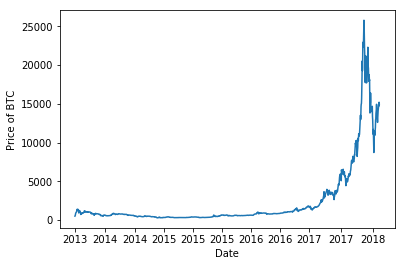

In [7]:
x, y = [], []
for i in range(len(y0)):
    if y0[i] != 0:
        x.append(x0[i])
        y.append(y0[i])
        
plt.plot(x, y)
plt.ylabel("Price of BTC")
plt.xlabel("Date")
plt.xticks(x[::150])
plt.show()

That's a lot of flat, uninteresting information. Let's zoom into this graph to see trends more closely.

In [8]:
# To find out where to zoom, let's first find the length of the data we're dealing with
print("Size of cleaned data set is: " + str(len(x)))

# We can also see where the peak value occurs and what the peak price was
max_price_value = max(y)
max_price_index = np.argmax(y)
peak_x_index = x[max_price_index]
print("BTC peak price: " + str(max_price_value))
print("BTC peak occurred on: " + str(x[max_price_index]))

Size of cleaned data set is: 1530
BTC peak price: 25780.3630192
BTC peak occurred on: 2017-12-17 00:00:00


In [9]:
# Another way to see relevant information is to use the `describe` feature of DataFrames
coin_data.describe()

,Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price
count,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1.568000e+03,1568.000000
mean,2161.304194,2219.815111,2082.817830,2155.407316,274.198620,1.899194e+05,2146.003702
std,4101.023985,4240.481356,3896.834473,4080.331777,596.419669,4.243166e+05,4046.356536
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,459.520000,468.405000,448.675000,459.072500,12.370750,1.677967e+04,458.301038
50%,729.450000,746.463900,715.080000,730.000000,91.402750,6.322699e+04,734.053445
75%,1302.882500,1324.852500,1266.790000,1305.710000,300.452450,1.972589e+05,1305.900423
max,25831.850000,26333.630000,25359.990000,25863.860000,8019.045300,5.759165e+06,25780.363019


What is the median price of Bitcoin? Mean price? Interquartile range (Q3-Q1)? Anything interesting from the descriptions?
<br> <br>
Also, was iPython able to do this operation quickly?

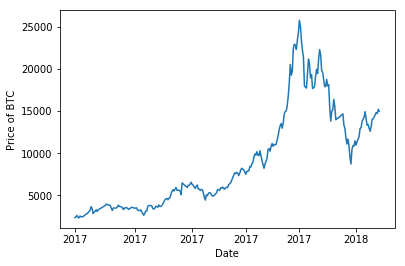

In [10]:
# Using this and the fact that data was collected daily since 2013, we can approximate where the peak occurs and zoom in
# Let's arbitrarily use the last 200 recorded days prior to the peak
# Extra: Change this number and see what happens
zoom_x = x[max_price_index - 200:]
zoom_y = y[max_price_index - 200:]
plt.plot(zoom_x, zoom_y)
plt.ylabel("Price of BTC")
plt.xlabel("Date")
plt.xticks(zoom_x[::50])
plt.show()

# Part 2: Predicting trends!

Look! We've been able to find out more about our data, including where the price peaked, what aspects of the data set were irrelevant/removable, and which portion of data is of the most interest to us. <br>

Now that we have seen our data and worked with it a little bit, we can use Python's ML libraries (available through `sklearn`) to predict prices. <br>

Just remember, this is really difficult to do accurately &mdash; but doing it well could make you lots of \$\$\$. (Why?) 

In [118]:
"""
Modules

Descriptions:
sklearn is the standard Python machine learning library
linear_model contains functions for linear regression, an entry-level machine learning model
- linear_model.LinearRegression() creates an object that can perform linear regression
- we will also be using fit(), predict(), and coef_
"""
from sklearn import linear_model

To get you acquainted with this topic, we'll use a rather basic modeling technique called linear regression. This technique fits data points with a curve that minimizes error (distance between the predicted price and the actual price). There are alternatives to linear regression, and you should check them out! <br>

Now, look back at the price graph. What type of function (constant, linear, quadratic, cubic) could best represent our price trends? Answer below!

Answer:

Linear regression normally works with a linear model: $y_i = a*x_i + b$. It uses linear algebra to estimate the coefficients ($a$ and $b$ in this case).<br>
<br>
However our data appears to be somewhat quadratic. What does a quadratic model look like? <br>
Put your answer below! (If you're not sure, don't worry! We'll clarify this more once we get some feedback.)

Answer:

A quadratic model looks like this: $y_i = a * x_i ^ 2 + b * x_i + c$ <br>
<br> 
To achieve this model structure, we can add **features** to our data to help linearize it. Features are the variable terms that we are adding to our existing linear model ($y_i = a*x_i + b$) to turn it into the desired quadratic model. With features, we can find a best fit line by calculating the coefficients ($a, b, c$) that create a function that fits our data as closely as possible. <br> 
<br>
What features should we add to our data? 

In [11]:
quadratic = [[x ** 2, x, 1] for x in np.arange(0, len(y))] # quadratic features to use in our estimation

### The machine learning part (finally)

We have a bunch of $x$s and $y$s. We've prepped our data by adding features to linearize it. Now, we get to use the `LinearRegression()` function in `sklearn`'s `linear_model` class. This function creates an object that can perform linear regression on our data points to find the best coefficients to optimize our model. (What was our model again?)

In [30]:
linreg = linear_model.LinearRegression() # call the sklearn.linear_model function
linreg.fit(quadratic, y) # the fit() function creates the best fit line

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [31]:
print(linreg.coef_)
print("Function: " + " + ".join(["%.8f" % linreg.coef_[i] + "x^" + str(i) for i in range(len(linreg.coef_))]))
print(linreg.score(quadratic, y)) # Figure out the R^2 "score" of our prediction (out of 1.0)

[  1.34577487e-02  -1.51782104e+01   0.00000000e+00]
Function: 0.01345775x^0 + -15.17821036x^1 + 0.00000000x^2
0.672557423568


**HOLD UP**

What does the .fit() function do? What are features and why did we use them?

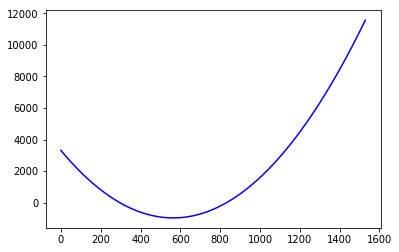

In [110]:
# Let's see the graph that our regression created. 
y_hat = linreg.predict(quadratic)
plt.plot(y_hat,'-b')
plt.show()

In [115]:
# How good was our prediction? Calculate the total squared error!
squared_errors_quadratic = [(y_hat[i] - y[i]) ** 2 for i in range(len(y))]
print("Total sq error is {0}".format(sum(squared_errors_quadratic)))
print("Average sq error is {0}".format(sum(squared_errors_quadratic)/len(squared_errors_quadratic)))

Total sq error is 8342301615.101602
Average sq error is 5452484.715752681


### We can try changing the model to see how the graph changes.
Note: we are not using a training set to train our model. We are just fitting a model directly to our test data and eyeballing the features.
Hint: *one way to do this quickly is to create a function that determines the different polynomial types to consider in our function.*

Function: -0.00000105x^0 + 0.01063038x^1 + -10.97636726x^2 + 0.00000000x^3
0.715381739381


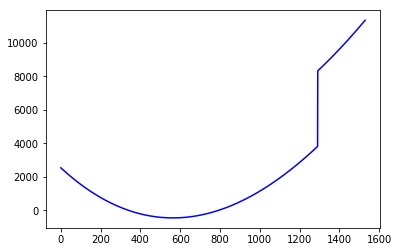

Function: 0.00000000x^0 + -10.95239405x^1 + 0.01061577x^2 + -0.00000105x^3 + 0.00000004x^4
0.71550959765


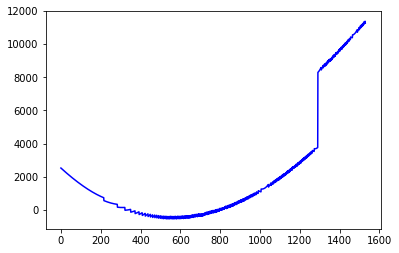

In [33]:
def create_prediction_function(test_x, test_y):
#     x_inds = [[i ** j for j in range(deg + 1)] for i in np.arange(0, len(train_y))]
    reg = linear_model.LinearRegression()
    reg.fit(test_x, test_y)
    print("Function: " + " + ".join(["%.8f" % reg.coef_[i] + "x^" + str(i) for i in range(len(reg.coef_))]))
    print(reg.score(test_x, test_y)) # Figure out the R^2 "score" of our prediction (out of 1.0)
    plt.plot(reg.predict(test_x),'-b')
    plt.show()
    return reg

cubic = [[x ** 3, x ** 2, x, 1] for x in np.arange(0, len(y))]
quartic = [[x ** i for i in range(0,5)] for x in np.arange(0, len(y))]
cubic_linreg = create_prediction_function(cubic, y)
quartic_linreg = create_prediction_function(quartic, y)

As you can see in the code above, we can use linreg.predict() to figure out what our model will predict as the BTC price for a given date (index). We used this to graph our predicted function, but we can also use it to project the value of BTC. <br>
<br>
Once again, we'll use our friend the DataFrame for this!

In [108]:
current_day_number = len(x) - 1
days_to_predict = [1400, 1500, 1529, 1600, 1700, 1780, 1800, 1900, 2000] # points you would like to predict (numerical)

# use pd.DateOffset to figure out actual time stamps
actual_dates_to_predict = [x[current_day_number] + pd.DateOffset(days=i-current_day_number) for i in days_to_predict]

# add features to our inputs to make predictions using the model
predictions = linreg.predict([[i**2, i, 1] for i in days_to_predict])
df = pd.DataFrame({'Predicted Price':predictions, 
                   'Actual (if exists)':[y[i] if i <= current_day_number else None for i in days_to_predict]},
                  index=actual_dates)
df.index.name = 'Date'
df

,Actual (if exists),Predicted Price
Date,,
2017-10-28,7624.098051,8439.949563
2018-02-05,11683.388006,10824.875658
2018-03-06,14983.760000,11566.849663
2018-05-16,NaN,13478.956727
2018-08-24,NaN,16402.192771
2018-11-12,NaN,18934.573187
2018-12-02,NaN,19594.583789
2019-03-12,NaN,23056.129782
2019-06-20,NaN,26786.830749


#### Try this out for the cubic or quartic models we made. 
How do the models differ in their predictions? Which model do you trust? Any ideas on better functions to use as models?

In [75]:
# Pick a model and adjust the code in the previous cell to figure out the predicted prices on days in days_to_predict
# Create new dataframes for each model you use (this will make it easier to graph in the next step)
# YOUR CODE HERE

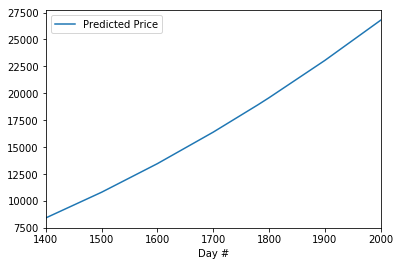

In [76]:
# Use DataFrame.plot() and sub in the new dataframe containing predictions made by the model you used 
# to generate a graphical comparison of the predicted prices.
df.plot()
# YOUR CODE HERE
plt.show()

# Conclusion

How good were our predictions? Is it easy to predict trends accurately?